# Introduction

My project consists of an analysis of the European Social Survey, focusing on the modules which measure attitudes to immigration in Ireland. 

### Description of dataset

The European Social Survey (ESS) is a cross-national survey which aims to monitor public attitudes within Europe. It is conducted every two years, and it has been administered in over 40 countries since 2001. Each round of the survey is designed to capture a cross-sectional random sample in each of the participating countries.

For this project, round X was used. For ireland only??? decide later.

### Research Questions
DRAFT QUESTIONS - EDIT OR REMOVE LATER ONCE CLEANING IS DONE
1)	What was the level of (anti)- immigrant sentiment in Ireland in 2020?
2)	What was the relationship between an individual’s attitude to immigrants and their income level?
3)	What was the relationship between an individual’s attitude to immigrants and whether they had completed third-level education?
4)	What was the relationship between an individual’s attitude to immigrants and their choice of political party?


### Part 1: Reading in the data

In [39]:
#import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import scipy.stats # statistical functions
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

At this point, I am setting my notebook to [ignore certain warnings](https://www.geeksforgeeks.org/python/how-to-disable-python-warnings/) in order to perserve tidiness.

In [4]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [5]:
# start with loading all available data into a data frame
df = pd.read_csv("./data.csv")
df.info()

/tmp/ipykernel_2718/3021999600.py:2: DtypeWarning: Columns (635,636,637,638,639,644,645,646,647,648,666,667,668,669,677,678,679,680,681,682,683,684,1534,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1606,1607,1608) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24250 entries, 0 to 24249
Columns: 2785 entries, name to recon
dtypes: float64(2615), int64(128), object(42)
memory usage: 515.3+ MB


### Part 2: Data Cleaning and Processing

In [6]:
# first see the fields and data types
df.dtypes

name         object
essround      int64
edition     float64
proddate     object
idno          int64
             ...   
respc19a    float64
symtc19     float64
symtnc19    float64
vacc19      float64
recon       float64
Length: 2785, dtype: object

In [ ]:
# check the dimensionality of the data. see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html 
df.shape 

(24250, 2785)

In [7]:
df.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,testji5,testji6,testji7,testji8,testji9,respc19a,symtc19,symtnc19,vacc19,recon
0,ESS1e06_7,1,6.7,23.11.2023,101,IE,0.9165,0.733937,0.150276,0.110293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESS1e06_7,1,6.7,23.11.2023,102,IE,0.9165,0.700541,0.150276,0.105274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ESS1e06_7,1,6.7,23.11.2023,104,IE,1.8331,1.445871,0.150276,0.217279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ESS1e06_7,1,6.7,23.11.2023,105,IE,0.9165,1.030524,0.150276,0.154863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ESS1e06_7,1,6.7,23.11.2023,106,IE,1.3748,1.084384,0.150276,0.162957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are too many fields so let's cut it down to just what we want.

In [8]:
# take the last five years of rounds for now by specify ess round 7 - 10. 
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html 
df_v2 = df[df['essround'].between(7, 11)]

In [9]:
# Using the data dictionary, just take the columns that we are interested in
# administrative variables, socio-demographics, political allegiance and immigrant sentiment items 
df_v3 = df_v2[ ['name', 'edition', 'proddate', 'idno', 'anweight', 'edlvdie', 'isco08', 'hinctnta', 'prtvtdie', 'imsmetn', 'imdfetn', 'impcntr', 'imbgeco', 'imueclt', 'imwbcnt'] ]
print(type(df_v3))
df_v3

<class 'pandas.core.frame.DataFrame'>


,name,edition,proddate,idno,anweight,edlvdie,isco08,hinctnta,prtvtdie,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt
13100,ESS7e02_3,2.3,23.11.2023,2,0.074851,12.0,5223.0,3.0,NaN,2,2,2,5,8,8
13101,ESS7e02_3,2.3,23.11.2023,4,0.154009,9.0,4211.0,3.0,NaN,1,2,2,5,9,6
13102,ESS7e02_3,2.3,23.11.2023,5,0.341264,3.0,66666.0,1.0,NaN,2,2,2,5,5,6
13103,ESS7e02_3,2.3,23.11.2023,8,0.205346,2.0,9112.0,1.0,NaN,2,3,3,2,3,2
13104,ESS7e02_3,2.3,23.11.2023,11,0.099170,2.0,8331.0,3.0,NaN,2,3,3,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24245,ESS11e04,4.0,19.11.2025,86371,0.149981,15.0,2221.0,77.0,NaN,2,2,2,5,5,5
24246,ESS11e04,4.0,19.11.2025,86380,0.071264,13.0,66666.0,4.0,NaN,1,1,1,4,6,6
24247,ESS11e04,4.0,19.11.2025,86423,0.151995,14.0,1321.0,5.0,NaN,3,3,3,8,7,8
24248,ESS11e04,4.0,19.11.2025,86468,0.057569,3.0,66666.0,1.0,NaN,2,4,4,5,5,5


In [10]:
# rename columns for readability
df_v3.rename(columns = {'name':'Name', 'edition':'Edition', 'proddate': 'Production Date', 'idno': 'Identification Number','anweight': 'anweight', 'edlvdie': 'Highest lvl of Ed', 'hinctnta': 'Households net income', 'prtvtdie': 'Party voted for in last national election', 'imsmetn' : 'Allow many/few immigrants of same race/ethnic group as majority', 'imdfetn': 'Allow many/few immigrants of different race/ethnic group from majority', 'impcntr': 'Allow many/few immigrants from poorer countries outside Europe', 'imbgeco': 'Immigration bad or good for countrys economy', 'imueclt': 'Countrys cultural life undermined or enriched by immigrants', 'imwbcnt': 'Immigrants make country worse or better place to live'}, inplace = True)
df_v3

,Name,Edition,Production Date,Identification Number,anweight,Highest lvl of Ed,isco08,Households net income,Party voted for in last national election,Allow many/few immigrants of same race/ethnic group as majority,Allow many/few immigrants of different race/ethnic group from majority,Allow many/few immigrants from poorer countries outside Europe,Immigration bad or good for countrys economy,Countrys cultural life undermined or enriched by immigrants,Immigrants make country worse or better place to live
13100,ESS7e02_3,2.3,23.11.2023,2,0.074851,12.0,5223.0,3.0,NaN,2,2,2,5,8,8
13101,ESS7e02_3,2.3,23.11.2023,4,0.154009,9.0,4211.0,3.0,NaN,1,2,2,5,9,6
13102,ESS7e02_3,2.3,23.11.2023,5,0.341264,3.0,66666.0,1.0,NaN,2,2,2,5,5,6
13103,ESS7e02_3,2.3,23.11.2023,8,0.205346,2.0,9112.0,1.0,NaN,2,3,3,2,3,2
13104,ESS7e02_3,2.3,23.11.2023,11,0.099170,2.0,8331.0,3.0,NaN,2,3,3,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24245,ESS11e04,4.0,19.11.2025,86371,0.149981,15.0,2221.0,77.0,NaN,2,2,2,5,5,5
24246,ESS11e04,4.0,19.11.2025,86380,0.071264,13.0,66666.0,4.0,NaN,1,1,1,4,6,6
24247,ESS11e04,4.0,19.11.2025,86423,0.151995,14.0,1321.0,5.0,NaN,3,3,3,8,7,8
24248,ESS11e04,4.0,19.11.2025,86468,0.057569,3.0,66666.0,1.0,NaN,2,4,4,5,5,5


This section deals with nulls and value labels. The ESS Codebook specifies the specific values for each colummn which indicate a null and what each value indicates.

In [11]:
# map these income labels based on what's in the code book
# see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html 
income_labels =  {1.0: '1st', 2.0: '2nd', 3.0: '3rd', 4.0: '4th', 5.0: '5th', 6.0: '6th', 7.0: '7th', 8.0: '8th', 9.0: '9th', 10: '10th', 77.0: "Null",  88.0: "Null", 99.0: "Null"}

In [12]:
highest_ed_labels = {1.0: 'Left school before finishing primary school', 2.0: 'Left school after the end of primary school but before reaching the end of junior cycle', 3.0: 'Junior Certificate', 4.0: 'Vocational NFQ Level 3 courses, certified by FETAC', 5.0: 'Vocational NFQ level 4 courses, e.g. FETAC specific', 6.0: 'Leaving Certificate Established (LCE); Leaving Certificate Vocational Programme (LCVP)', 7.0: 'Leaving Certificate Applied programme', 8.0: 'Apprenticeship - FAS/SOLAS', 9.0: 'Post-Leaving Certificate (PLC) courses (duration of 1 year)', 10.0: 'Post-Leaving Certificate (PLC) courses of 2 or more years duration', 11.0: 'Edexcel/BTEC/BEC/TEC - Higher National Certificate', 12.0: 'Higher Certificate', 13.0: 'Diploma', 14.0: 'Higher level/honours bachelor degree', 15.0: 'Higher/Graduate Diploma', 16.0: 'Post-graduate Diploma', 17.0: 'Masters Degree, M.Phil', 18.0: 'Ph.D, D.Phil or equivalent', 5555.0: 'Other'}

In [13]:
party_labels = {1.0: 'Fianna Fáil', 2.0: 'Fine Gael', 3.0: 'Labour', 4.0: 'Sinn Féin', 5.0: 'Independent', 6.0: 'Green Party', 7.0: 'Socialist Party', 8.0: 'Solidarity/People Before Profit', 9.0: 'RENUA Ireland', 10.0:'Aontu', 11.0: 'Independents4Change', 12.0:'Social Democrats', 13.0:'Workers Party', 14.0: 'Other'}

In [14]:
immig_labels = {1.0: 'Allow many to come and live here', 2.0: 'Allow some', 3.0: 'Allow a few', 4.0: 'Allow none'}

Now map them on

In [15]:
df_v3['Households net income'] = df_v3['Households net income'].map(income_labels)
df_v3['Highest lvl of Ed_recoded'] = df_v3['Highest lvl of Ed'].map(highest_ed_labels)
df_v3['Party voted for in last national election_recoded'] = df_v3['Party voted for in last national election'].map(party_labels)
df_v3['Allow many/few immigrants of same race/ethnic group as majority_recoded'] = df_v3['Allow many/few immigrants of same race/ethnic group as majority'].map(immig_labels)
df_v3['Allow many/few immigrants of different race/ethnic group from majority_recoded'] = df_v3['Allow many/few immigrants of different race/ethnic group from majority'].map(immig_labels)
df_v3['Allow many/few immigrants from poorer countries outside Europe_recoded'] = df_v3['Allow many/few immigrants from poorer countries outside Europe'].map(immig_labels)


In [20]:
# Let's check the unique values of our fields of analysis
cols = [
    'Households net income',
    'Highest lvl of Ed_recoded',
    'Party voted for in last national election_recoded',
    'Allow many/few immigrants of same race/ethnic group as majority_recoded',
    'Allow many/few immigrants of different race/ethnic group from majority_recoded',
    'Allow many/few immigrants from poorer countries outside Europe_recoded'
]


In [22]:
unique_vals = {col: df_v3[col].unique() for col in cols}
print(unique_vals)

{'Households net income': array(['3rd', '1st', 'Null', '5th', '7th', '2nd', '4th', '6th', '8th',
       '9th', '10th'], dtype=object), 'Highest lvl of Ed_recoded': array(['Higher Certificate',
       'Post-Leaving Certificate (PLC) courses (duration of 1 year)',
       'Junior Certificate',
       'Left school after the end of primary school but before reaching the end of junior cycle',
       'Post-Leaving Certificate (PLC) courses of 2 or more years duration',
       'Left school before finishing primary school',
       'Vocational NFQ Level 3 courses, certified by FETAC',
       'Vocational NFQ level 4 courses, e.g. FETAC specific', nan,
       'Diploma', 'Apprenticeship - FAS/SOLAS',
       'Leaving Certificate Applied programme',
       'Higher level/honours bachelor degree', 'Masters Degree, M.Phil',
       'Leaving Certificate Established (LCE); Leaving Certificate Vocational Programme (LCVP)',
       'Edexcel/BTEC/BEC/TEC - Higher National Certificate',
       'Higher/Graduate 

### Part 3: Data Exploration

In this section, I explore each column to identify descriptive statistics and distribution of each relevant column. Some field are numeric and some are categorical. Descriptive statistics and histograms will be used to explore the numeric variables. Bar charts will be used to look at the categorical variables. 

To start, I created a function that produces descriptive statistics for each of the fields of interest. This was adapted from [here](https://www.statology.org/5-diy-python-functions-to-master-descriptive-statistics/). 

In [36]:
# just the numeric ones
cols_imm = [
    'Allow many/few immigrants of same race/ethnic group as majority',
    'Allow many/few immigrants of different race/ethnic group from majority',
    'Allow many/few immigrants from poorer countries outside Europe'
]

In [37]:
def get_descriptives(columns, df):
    for column in columns:
        item = df[column]
        print(f"=== {column} ===")
        print("Count: " +  str(item.count()))
        print("Mean: " + str(item.mean()))
        print("Median: " + str(item.median()))
        print("SD: " + str(item.std()))
        print("Max: " + str(item.max()))
        print("Min: " + str(item.min()))
        print("Skewness: " + str(item.skew()))
        print("Kurtosis: " + str(item.kurtosis()))
        print("Variance: " + str(item.var()))
        print()

In [38]:
# I've already created a cols variable so i will pass that to my function
get_descriptives(cols_imm, df_v3)

=== Allow many/few immigrants of same race/ethnic group as majority ===
Count: 11150
Mean: 2.2278923766816146
Median: 2.0
SD: 1.1036483936190933
Max: 8
Min: 1
Skewness: 2.020100379939528
Kurtosis: 7.935286680981637
Variance: 1.218039776738005

=== Allow many/few immigrants of different race/ethnic group from majority ===
Count: 11150
Mean: 2.4134529147982065
Median: 2.0
SD: 1.1485729606670392
Max: 8
Min: 1
Skewness: 1.8267900690705938
Kurtosis: 6.753768107180651
Variance: 1.319219845975448

=== Allow many/few immigrants from poorer countries outside Europe ===
Count: 11150
Mean: 2.5038565022421526
Median: 2.0
SD: 1.2018960627689432
Max: 8
Min: 1
Skewness: 1.787970136485229
Kurtosis: 6.127525113408918
Variance: 1.4445541456994877



Next, we will visualise these data using histograms. This was initially done using [pyplot](https://matplotlib.org/stable/gallery/statistics/hist.html) but was visiaully unappealing. I asked ChatGPT to rewrite the code using seaborn and then adapted as needed. 

See prompt [here](https://chatgpt.com/share/69431f18-514c-800f-a809-aaddc7c9178c) 

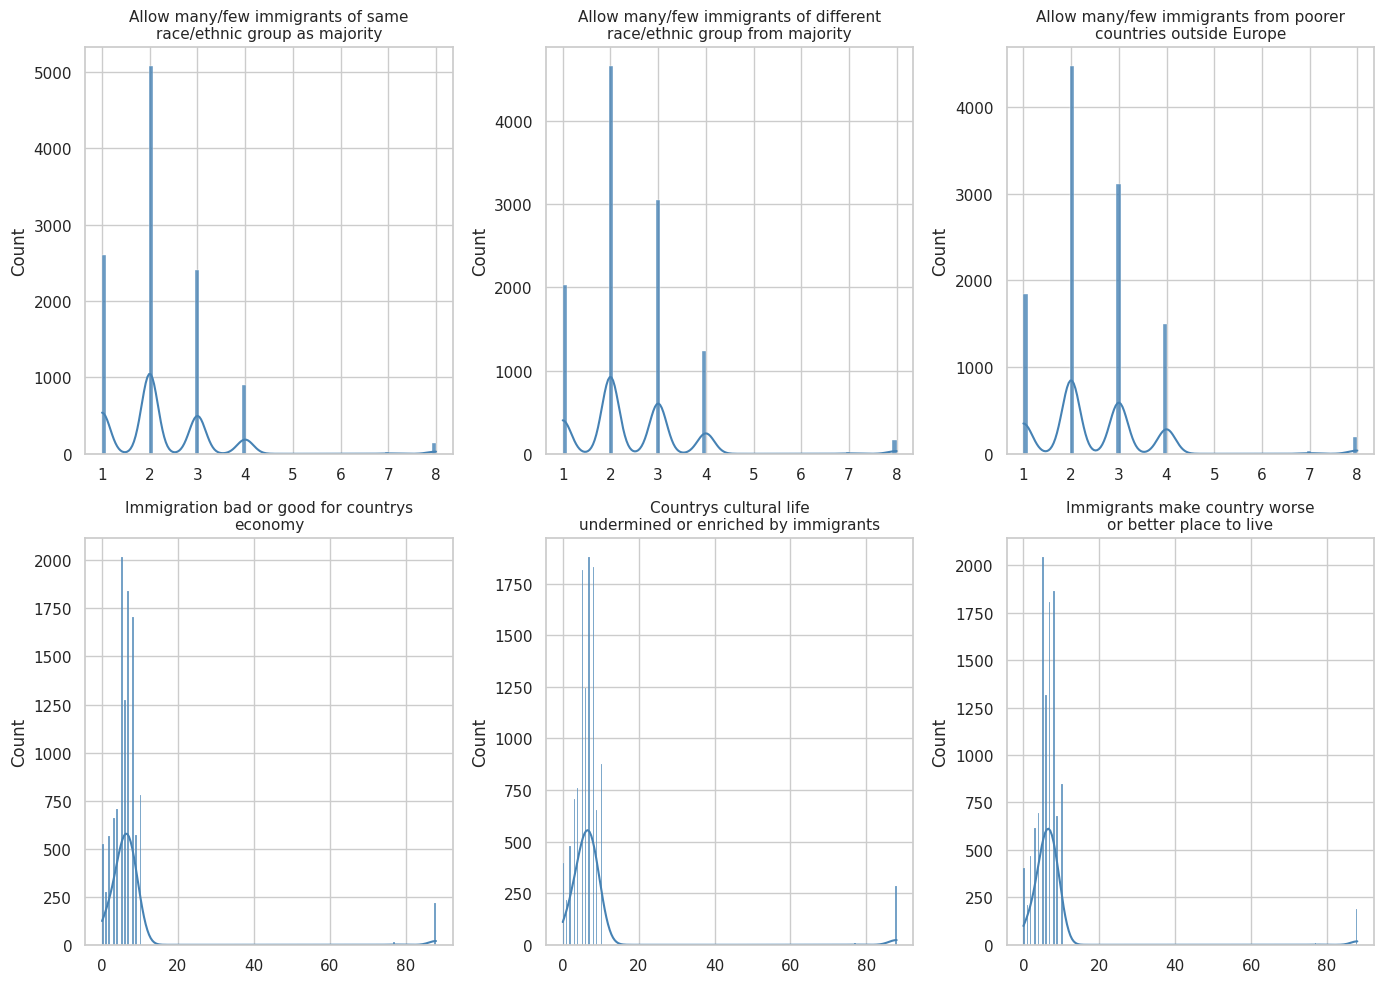

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Global seaborn styling (easy to tweak)
sns.set_theme(
    style="whitegrid",
    context="notebook",
    font_scale=1.0
)

fig, axs = plt.subplots(2, 3, figsize=(14, 10))

plots = [
    (
        'Allow many/few immigrants of same race/ethnic group as majority',
        'Allow many/few immigrants of same\nrace/ethnic group as majority'
    ),
    (
        'Allow many/few immigrants of different race/ethnic group from majority',
        'Allow many/few immigrants of different\nrace/ethnic group from majority'
    ),
    (
        'Allow many/few immigrants from poorer countries outside Europe',
        'Allow many/few immigrants from poorer\ncountries outside Europe'
    ),
    (
        'Immigration bad or good for countrys economy',
        'Immigration bad or good for countrys\neconomy'
    ),
    (
        'Countrys cultural life undermined or enriched by immigrants',
        'Countrys cultural life\nundermined or enriched by immigrants'
    ),
    (
        'Immigrants make country worse or better place to live',
        'Immigrants make country worse\nor better place to live'
    )
]

# Flatten axes for easy iteration
axs = axs.flatten()

for ax, (col, title) in zip(axs, plots):
    sns.histplot(
        data=df_v3,
        x=col,
        bins="auto",        # much better than fixed bins
        kde=True,           # remove if you don’t want smoothing
        color="steelblue",
        alpha=0.8,
        edgecolor="white",
        ax=ax
    )
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()
